# Random Forests Model: Predicting Music Interest with Personality Questions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [2]:
personality_questions = pd.read_csv('cleaned_youngpeople_data.csv')

In [3]:
personality_questions

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5,3,2,1,2,2,1,5,5,1,...,20,163,48,1,female,right handed,college/bachelor degree,no,village,block of flats
1,4,4,2,1,1,1,2,3,5,4,...,19,163,58,2,female,right handed,college/bachelor degree,no,city,block of flats
2,5,5,2,2,3,4,5,3,5,3,...,20,176,67,2,female,right handed,secondary school,no,city,block of flats
3,5,3,2,1,1,1,1,2,2,1,...,22,172,59,1,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5,3,4,3,2,4,3,5,3,1,...,20,170,59,1,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,5,2,5,2,2,5,4,4,4,3,...,20,164,57,1,female,right handed,secondary school,no,city,house/bungalow
973,4,4,5,1,3,4,1,4,1,1,...,27,183,80,5,male,left handed,masters degree,no,village,house/bungalow
974,4,3,1,1,2,2,2,3,4,1,...,18,173,75,0,female,right handed,secondary school,yes,city,block of flats
975,5,3,3,3,1,3,1,3,4,1,...,25,173,58,1,female,right handed,college/bachelor degree,no,city,block of flats


In [4]:
pd.options.display.max_seq_items = None

In [5]:
personality_questions.columns

Index(['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll',
       'Alternative', 'Latino', 'Techno, Trance', 'Opera', 'Movies', 'Horror',
       'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War',
       'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western', 'Action',
       'History', 'Psychology', 'Politics', 'Mathematics', 'Physics',
       'Internet', 'PC', 'Economy Management', 'Biology', 'Chemistry',
       'Reading', 'Geography', 'Foreign languages', 'Medicine', 'Law', 'Cars',
       'Art exhibitions', 'Religion', 'Countryside, outdoors', 'Dancing',
       'Musical instruments', 'Writing', 'Passive sport', 'Active sport',
       'Gardening', 'Celebrities', 'Shopping', 'Science and technology',
       'Theatre', 'Fun with friends', 'Adrenaline sports', 'Pets', 'Flying',
       'Storm', 'Darkness', 'Heights', 'Spiders

In [6]:
personality_questions[['Music','Dance','Folk', 'Country', 'Classical music', 'Musical', 'Pop', 
                                                            'Rock', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 
                                                            'Reggae, Ska', 'Swing, Jazz', 'Rock n roll', 
                                                            'Alternative', 'Latino', 'Techno, Trance', 'Opera']].describe()

,Music,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
count,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000
mean,4.736950,3.103378,2.279427,2.122825,2.960082,2.774821,3.487206,3.766633,2.362334,2.446264,2.901740,2.762538,2.768680,3.147390,2.832139,2.844422,2.324463,2.143296
std,0.653957,1.164959,1.131116,1.075653,1.246899,1.257136,1.153261,1.174696,1.371450,1.291297,1.372508,1.208283,1.253569,1.232574,1.337691,1.324560,1.313605,1.182150
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
50%,5.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000
75%,5.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
#personality_questions['Top Genre'] = personality_questions[['Dance', 'Pop','Rock']].idxmax(axis=1)
#^ugly feature engineering that only got accuracy of 20% so no point, plus loses info

## Single Random Forest Classifer for Predicting Level of Interest in Music

In [8]:
personality_to_music_questions = personality_questions[['Music', 'Daily events', 'Prioritising workload',
       'Writing notes', 'Workaholism', 'Thinking ahead', 'Final judgement',
       'Reliability', 'Keeping promises', 'Loss of interest',
       'Friends versus money', 'Funniness', 'Fake', 'Criminal damage',
       'Decision making', 'Elections', 'Self-criticism', 'Judgment calls',
       'Hypochondria', 'Empathy', 'Eating to survive', 'Giving',
       'Compassion to animals', 'Borrowed stuff', 'Loneliness',
       'Cheating in school', 'Health', 'Changing the past', 'God', 'Dreams',
       'Charity', 'Number of friends', 'Waiting',
       'New environment', 'Mood swings', 'Appearence and gestures',
       'Socializing', 'Achievements', 'Responding to a serious letter',
       'Children', 'Assertiveness', 'Getting angry',
       'Knowing the right people', 'Public speaking', 'Unpopularity',
       'Life struggles', 'Happiness in life', 'Energy levels',
       'Small - big dogs', 'Personality', 'Finding lost valuables',
       'Getting up', 'Interests or hobbies', "Parents' advice"]]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(personality_to_music_questions.drop(['Music'], axis='columns'),
                                                    personality_to_music_questions['Music'], 
                                                    test_size=0.2)
model = RandomForestClassifier(oob_score=True, random_state=42)
#using 150 decision trees, oob_score will give a 
model.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [10]:
model.score(X_test, y_test)

0.7959183673469388

In [11]:
#checking to see how well decision trees predicted scores
model.oob_score_

0.8220230473751601

In [12]:
y_predicted = model.predict(X_test)

In [13]:
confusematrix = confusion_matrix(y_test, y_predicted)

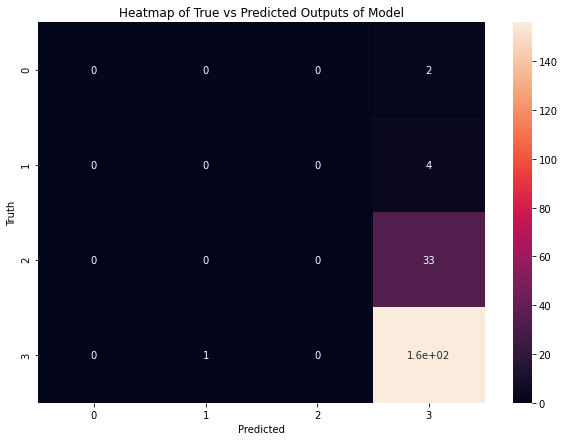

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(confusematrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Heatmap of True vs Predicted Outputs of Model')
plt.show()

### Variable Importance Measures

In [15]:
model.feature_importances_

array([0.02110139, 0.01962894, 0.0220546 , 0.02089918, 0.01807492,
       0.01810028, 0.02144338, 0.0149364 , 0.01771135, 0.01795963,
       0.0248499 , 0.01883107, 0.0174608 , 0.01965215, 0.0190241 ,
       0.02008211, 0.01852307, 0.01565343, 0.01931683, 0.02383714,
       0.01641333, 0.02789633, 0.02023938, 0.0197228 , 0.01716385,
       0.01788694, 0.01692942, 0.01814883, 0.01433535, 0.01566741,
       0.02029338, 0.01945144, 0.01535121, 0.01928124, 0.0185989 ,
       0.01726135, 0.02010194, 0.01779218, 0.02223535, 0.01730489,
       0.02264193, 0.01890384, 0.01948636, 0.01582712, 0.01879684,
       0.02012783, 0.01763166, 0.01811359, 0.01324474, 0.01953029,
       0.01762549, 0.02216221, 0.01469187])

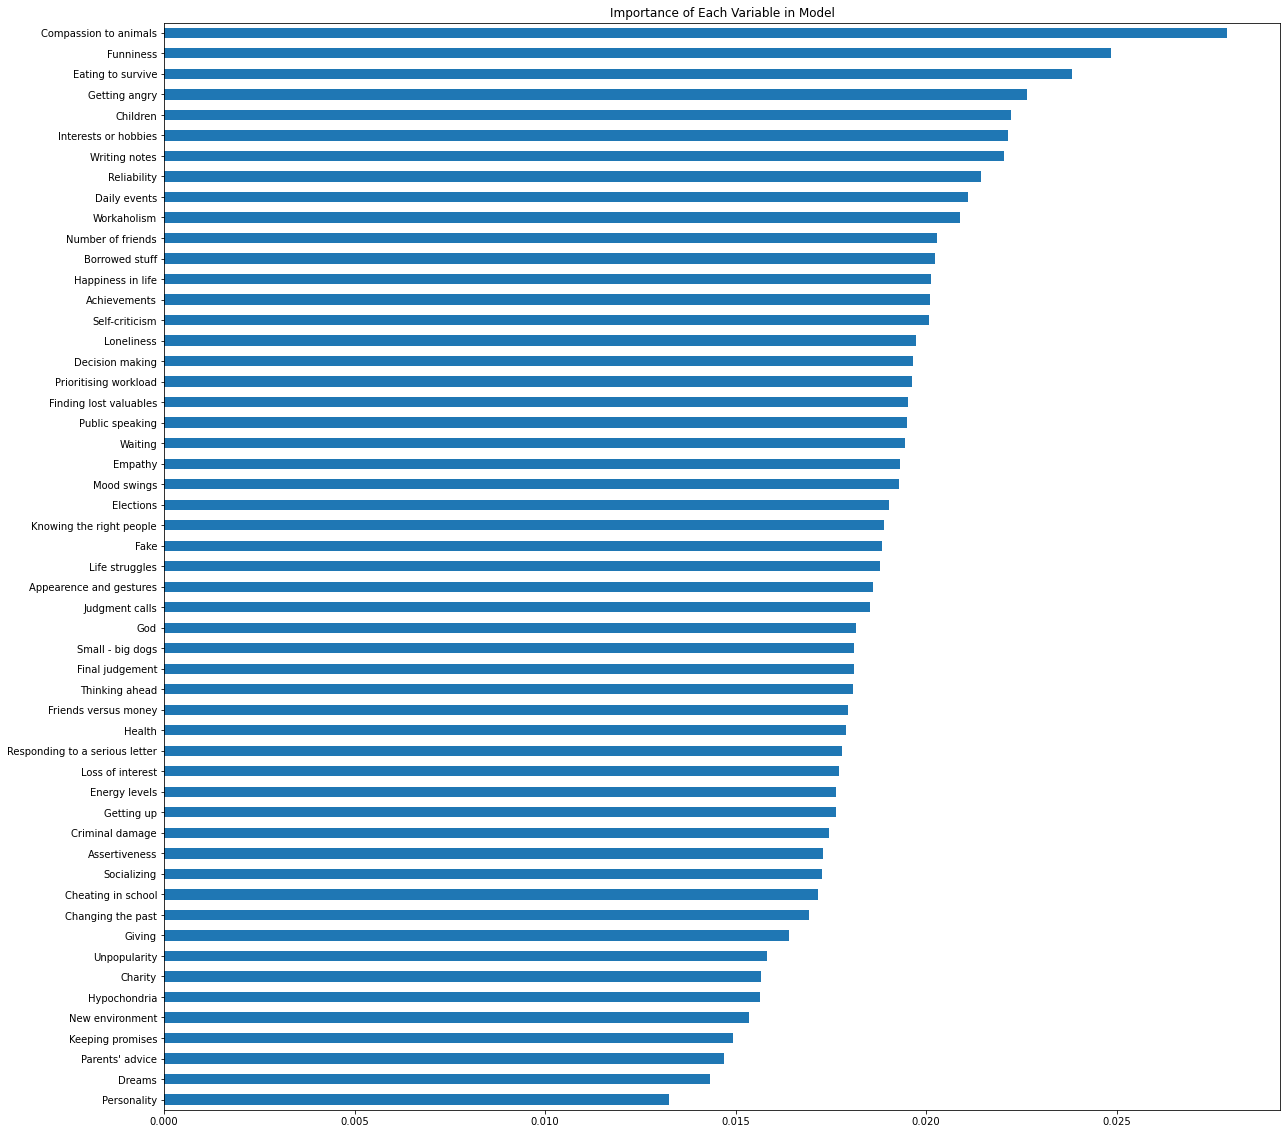

In [16]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind="barh", figsize=(20,20))
plt.title('Importance of Each Variable in Model')
plt.show()

Using this visualization, we are able to drop columns which are not very impactful in our prediction which will help in making our model as fast as possible while still maintaining a similar, or even better, level of accuracy.

In [17]:
personality_to_music_questions.drop(columns=
                                    ['Personality', 'Hypochondria', 'Mood swings', 'Unpopularity', 
                                     'Dreams', 'Criminal damage', 'Happiness in life',
                                    'Cheating in school', 'God', 'Keeping promises',
                                    'Final judgement', 'Knowing the right people', 'Loss of interest',
                                    'Energy levels', 'Charity', 'Judgment calls', 'Fake',
                                    'Getting angry', "Parents' advice", 'Borrowed stuff', 'Loneliness',
                                    'Health', 'Life struggles', 'New environment', 'Reliability', 'Waiting'], 
                                    inplace=True)

/Users/madisonkohls/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
X_train, X_test, y_train, y_test = train_test_split(personality_to_music_questions.drop(['Music'], axis='columns'),
                                                    personality_to_music_questions['Music'], 
                                                    test_size=0.2)

### Hyperparameter Tuning

We will be using sklearn's [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html?highlight=randomizedsearchcv) to create a parameter grid and efficiently test our model. First, we can look at all the parameters of our model:

In [19]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [20]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
oob_score=[True]
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt', 'log2', 0.9, 0.2]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 3, 4, 5]
bootstrap = [True, False]
warm_start = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'warm_start': warm_start,
               'oob_score': oob_score}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt', 'log2', 0.9, 0.2],
 'min_samples_leaf': [1, 2, 3, 4, 5],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 155, 261, 366, 472, 577, 683, 788, 894, 1000],
 'oob_score': [True],
 'warm_start': [True, False]}


In [21]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
hyperparametermodel = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = hyperparametermodel, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         0.9, 0.2],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 155, 261, 366, 472,
                                                         577, 683, 788, 894,
                                                         1000],
                                        'oob_score': [True],
                                

In [22]:
rf_random.best_params_

{'warm_start': False,
 'oob_score': True,
 'n_estimators': 788,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 110,
 'bootstrap': True}

In [23]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

In [24]:
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.3469 degrees.
Accuracy = 84.57%.


In [25]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 0.3265 degrees.
Accuracy = 84.91%.


In [26]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.39%.


We will further the search for the best hyperparameters now that we have a general idea of what parameters work best. We will be using GridSearchCV.

In [27]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'oob_score': oob_score,
    'bootstrap': [True],
    'warm_start': [False],
    'max_depth': [1, 2, 3],
    'max_features': ['log2'],
    'min_samples_leaf': [4],
    'min_samples_split': [2],
    'n_estimators': [20, 50, 100]
}
# Create a based model
gridsearchmodel = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = gridsearchmodel, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [28]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  27 | elapsed:    1.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    2.1s finished


{'bootstrap': True,
 'max_depth': 1,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 20,
 'oob_score': True,
 'warm_start': False}

In [29]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 0.3265 degrees.
Accuracy = 84.91%.


In [30]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.39%.


In [31]:
bestmodel = RandomForestClassifier(bootstrap= True, max_depth=1,max_features='log2',
                                   min_samples_leaf=4,min_samples_split=2,
                                n_estimators=20, oob_score=True, warm_start=False, random_state=42)
bestmodel.fit(X_train, y_train)

RandomForestClassifier(max_depth=1, max_features='log2', min_samples_leaf=4,
                       n_estimators=20, oob_score=True, random_state=42)

In [32]:
bestmodel.score(X_test, y_test)

0.7704081632653061

In [33]:
bestmodel.oob_score_

0.8297055057618438

In [53]:
bestmodel.predict([])

ValueError: Number of features of the model must match the input. Model n_features is 27 and input n_features is 53 

In [55]:
X_train

array([[3, 1, 2, ..., 5, 4, 4],
       [4, 5, 5, ..., 1, 2, 4],
       [2, 3, 3, ..., 5, 5, 3],
       ...,
       [5, 5, 5, ..., 3, 4, 4],
       [3, 2, 1, ..., 5, 4, 4],
       [5, 2, 2, ..., 2, 5, 4]])

In [34]:
y_predicted = bestmodel.predict(X_test)

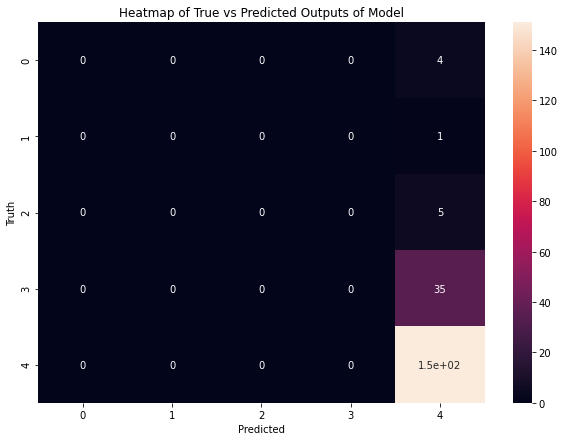

In [35]:
confusematrix = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(10,7))
sns.heatmap(confusematrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Heatmap of True vs Predicted Outputs of Model')
plt.show()

The model increased in accuracy to 85%, but as can be seen there isn't much variability in the responses. The reson for this is that the majority of respondants rated their enjoyment of music as a 4 so the model decided the best bet would be to rate them all a 4.

In [ ]:
import pickle
filename = 'random_forest_model.sav'
pickle.dump(model, open(filename, 'wb'))

## Multioutput Classification Model of Particular Music Genre Interest

Feature engineering a "top genre" makes it hard for the model to predict a genre, and the process of identifying each entry's favorite genre becomes difficult when they rate multiple genres with the highest score. We will be employing sklearn's [multioutput classifier](https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) to our random forests as a way to cut down on making individual models and see if we can predict interest level in multiple genres rather than level of interest in music.

In [36]:
from sklearn.multioutput import MultiOutputClassifier

In [37]:
personality_to_music_questions = personality_questions[['Country', 'Classical music', 'Pop', 
                                                        'Hiphop, Rap', 'Rock', 'Daily events', 'Prioritising workload',
                                                       'Writing notes', 'Workaholism', 'Thinking ahead', 'Final judgement',
                                                       'Reliability', 'Keeping promises', 'Loss of interest',
                                                       'Friends versus money', 'Funniness', 'Fake', 'Criminal damage',
                                                       'Decision making', 'Elections', 'Self-criticism', 'Judgment calls',
                                                       'Hypochondria', 'Empathy', 'Eating to survive', 'Giving',
                                                       'Compassion to animals', 'Borrowed stuff', 'Loneliness',
                                                       'Cheating in school', 'Health', 'Changing the past', 'God', 'Dreams',
                                                       'Charity', 'Number of friends', 'Waiting',
                                                       'New environment', 'Mood swings', 'Appearence and gestures',
                                                       'Socializing', 'Achievements', 'Responding to a serious letter',
                                                       'Children', 'Assertiveness', 'Getting angry',
                                                       'Knowing the right people', 'Public speaking', 'Unpopularity',
                                                       'Life struggles', 'Happiness in life', 'Energy levels',
                                                       'Small - big dogs', 'Personality', 'Finding lost valuables',
                                                       'Getting up', 'Interests or hobbies', "Parents' advice"]]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(personality_to_music_questions.drop(columns=['Country', 'Classical music', 'Pop', 
                                                        'Hiphop, Rap', 'Rock']), personality_to_music_questions[['Country', 'Classical music', 'Pop', 
                                                        'Hiphop, Rap', 'Rock']], test_size=0.2)

In [39]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_train

array([[3, 1, 2, ..., 5, 4, 4],
       [4, 5, 5, ..., 1, 2, 4],
       [2, 3, 3, ..., 5, 5, 3],
       ...,
       [5, 5, 5, ..., 3, 4, 4],
       [3, 2, 1, ..., 5, 4, 4],
       [5, 2, 2, ..., 2, 5, 4]])

In [40]:
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()
y_test
#Columns are 'Country', 'Classical music', 'Pop', 'Hiphop, Rap', 'Rock'

array([[3, 4, 5, 1, 5],
       [1, 4, 4, 3, 3],
       [1, 2, 4, 2, 5],
       [1, 5, 5, 4, 5],
       [1, 4, 3, 1, 5],
       [2, 2, 5, 4, 1],
       [1, 5, 4, 5, 4],
       [3, 3, 3, 3, 4],
       [4, 4, 2, 1, 3],
       [2, 3, 5, 3, 3],
       [3, 3, 3, 3, 3],
       [2, 3, 3, 3, 3],
       [2, 3, 3, 1, 4],
       [1, 3, 5, 5, 3],
       [2, 3, 4, 4, 2],
       [1, 1, 3, 2, 5],
       [3, 5, 5, 4, 4],
       [2, 5, 4, 1, 5],
       [5, 5, 5, 3, 5],
       [2, 3, 3, 5, 2],
       [2, 2, 3, 2, 5],
       [3, 2, 4, 1, 5],
       [3, 5, 5, 3, 4],
       [2, 5, 4, 1, 4],
       [1, 2, 2, 5, 4],
       [2, 2, 3, 4, 2],
       [2, 2, 4, 2, 4],
       [1, 3, 3, 1, 5],
       [1, 5, 2, 1, 5],
       [1, 2, 2, 2, 5],
       [1, 3, 4, 3, 3],
       [2, 4, 4, 1, 5],
       [2, 3, 4, 2, 4],
       [1, 3, 4, 2, 2],
       [2, 3, 4, 1, 5],
       [5, 4, 3, 3, 5],
       [4, 5, 3, 4, 4],
       [3, 2, 4, 5, 4],
       [3, 4, 2, 3, 5],
       [2, 5, 5, 4, 5],
       [4, 3, 5, 4, 3],
       [1, 3, 2,

In [44]:
forest = RandomForestClassifier(bootstrap= True, max_depth=1,max_features='log2',
                                   min_samples_leaf=4,min_samples_split=2,
                                n_estimators=20, oob_score=True, warm_start=False, random_state=42)
clf = MultiOutputClassifier(forest).fit(X_train, y_train)

In [45]:
clf.score(X_test, y_test) #0.0 the fuck-

0.0

In [46]:
clf.score(X_train, y_train)

0.0

In [1]:
clf.predict() # <--input answers to questions to get a prediction even tho the accuracy is '0' ._.

NameError: name 'clf' is not defined